# Exploratory Data Analysis on Titanic Dataset Using SQL and Python

## Objective:
### The goal of this project was to explore the famous Titanic dataset to understand passenger demographics, survival patterns, and other factors influencing survival. The analysis combined SQL for data extraction and aggregation with Python for visualization and further exploration.

## Data Preparation

### 1. The Titanic dataset was loaded from Seaborn into Python.

### 2. A SQLite database (titanic.db) was created, and the dataset was stored as a table.

### 3. SQL queries were used to aggregate and summarize the data efficiently.

### 4. Pandas DataFrames were used to fetch SQL query results for analysis and visualization.

In [139]:
# installing required Package
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


##  Store into SQLite database (creates titanic.db file with 'titanic' table)


In [98]:
import pandas as pd
import sqlite3

# Step 1: Load Titanic dataset into pandas
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
df = pd.read_csv(url)

# Step 2: Store into SQLite database (creates titanic.db file with 'titanic' table)
conn = sqlite3.connect("titanic.db")
df.to_sql("titanic", conn, if_exists="replace", index=False)

# Step 3: Run SQL queries
cursor = conn.cursor()


## SQL Queries

In [99]:
# How many passengers?
cursor.execute("SELECT COUNT(*) FROM titanic")
print("Total passengers:", cursor.fetchone()[0])


Total passengers: 891


In [100]:
# Survival count
cursor.execute("SELECT survived, COUNT(*) FROM titanic GROUP BY survived")
print("Survival count:", cursor.fetchall())


Survival count: [(0, 549), (1, 342)]


In [101]:
# Survival rate by gender
cursor.execute("""
SELECT sex, survived, COUNT(*) as count
FROM titanic
GROUP BY sex, survived
""")
print("Survival by gender:", cursor.fetchall())


Survival by gender: [('female', 0, 81), ('female', 1, 233), ('male', 0, 468), ('male', 1, 109)]


In [102]:
# Top embarkation towns
cursor.execute("""
SELECT embark_town, COUNT(*) as count
FROM titanic
GROUP BY embark_town
ORDER BY count DESC
""")
print("Passengers by embark town:", cursor.fetchall())


Passengers by embark town: [('Southampton', 644), ('Cherbourg', 168), ('Queenstown', 77), (None, 2)]


In [103]:
#Survival(repeat)
cursor.execute("""SELECT sex, survived, COUNT(*) AS total
FROM titanic
GROUP BY sex, survived""")
print("Survival by gender:", cursor.fetchall())

Survival by gender: [('female', 0, 81), ('female', 1, 233), ('male', 0, 468), ('male', 1, 109)]


In [104]:
# Average age by class
cursor.execute("""
SELECT pclass, AVG(age) as avg_age
FROM titanic
GROUP BY pclass
""")
print("Average age by class:", cursor.fetchall())


Average age by class: [(1, 38.233440860215055), (2, 29.87763005780347), (3, 25.14061971830986)]


In [132]:
# Average fare by survival
cursor.execute("""
SELECT survived, AVG(fare) 
FROM titanic
GROUP BY survived
""")
print("Average fare by survival:", cursor.fetchall())



Average fare by survival: [(0, 22.117886885245877), (1, 48.39540760233917)]


## We can do these queries in other way as well using SQLite

### Survival count

In [133]:
total = pd.read_sql("SELECT COUNT(*) as total FROM titanic", conn)
survival = pd.read_sql("SELECT survived, COUNT(*) as count FROM titanic GROUP BY survived", conn)

print(total)
print(survival)


   total
0    891
   survived  count
0         0    549
1         1    342


### Survival by gender

In [134]:
survival_gender = pd.read_sql("""
SELECT sex, survived, COUNT(*) as count
FROM titanic
GROUP BY sex, survived
""", conn)
print(survival_gender)


      sex  survived  count
0  female         0     81
1  female         1    233
2    male         0    468
3    male         1    109


### Average age by passenger class

In [135]:
age_class = pd.read_sql("""
SELECT pclass, AVG(age) as avg_age
FROM titanic
GROUP BY pclass
""", conn)
print(age_class)


   pclass    avg_age
0       1  38.233441
1       2  29.877630
2       3  25.140620


### Fare statistics by survival

In [136]:
fare_survival = pd.read_sql("""
SELECT survived, AVG(fare) as avg_fare, MIN(fare) as min_fare, MAX(fare) as max_fare
FROM titanic
GROUP BY survived
""", conn)
print(fare_survival)


   survived   avg_fare  min_fare  max_fare
0         0  22.117887       0.0  263.0000
1         1  48.395408       0.0  512.3292


### Passengers by embarkation town

In [137]:
embark = pd.read_sql("""
SELECT embark_town, COUNT(*) as count
FROM titanic
GROUP BY embark_town
ORDER BY count DESC
""", conn)
print(embark)


   embark_town  count
0  Southampton    644
1    Cherbourg    168
2   Queenstown     77
3         None      2


## EDA (Visualization)

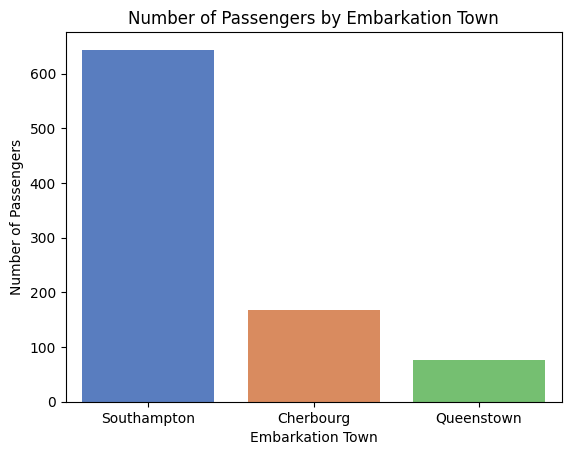

In [119]:
sns.barplot(data=embark, x='embark_town', y='count', palette='muted')
plt.title('Number of Passengers by Embarkation Town')
plt.xlabel('Embarkation Town')
plt.ylabel('Number of Passengers')
plt.show()

### Highlighted the distribution of passengers boarding from Southampton, Cherbourg, and Queenstown.

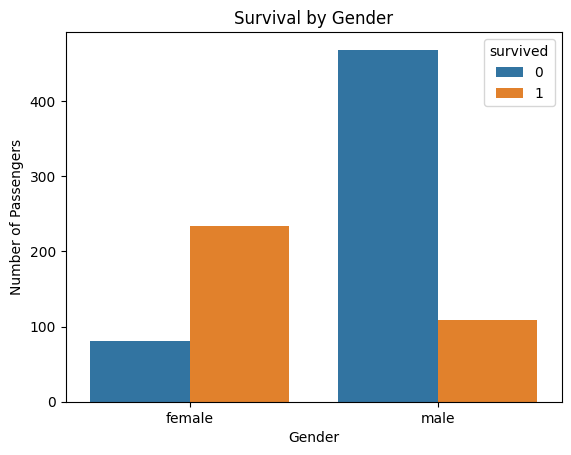

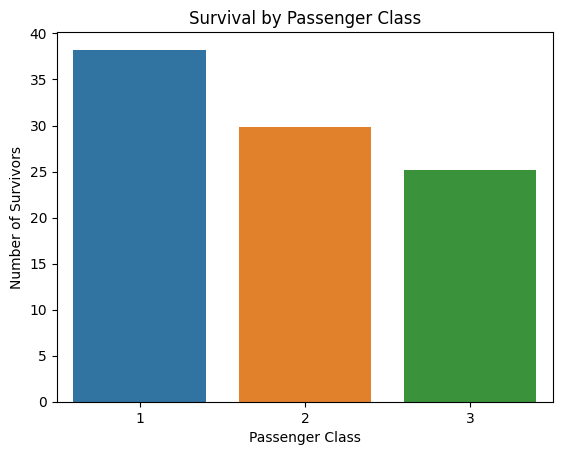

In [138]:
# Survival by gender
sns.barplot(data=survival_gender, x='sex', y='count', hue='survived')
plt.title('Survival by Gender')
plt.ylabel('Number of Passengers')
plt.xlabel('Gender')
plt.show()

# Survival by passenger class
sns.barplot(data=age_class, x='pclass', y='avg_age')  # Example: you can replace with survival counts by class
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Survivors')
plt.show()


### Females had a significantly higher survival rate than males.
### First-class passengers had the highest survival rates, second class was moderate, and third-class passengers had the lowest survival rates.

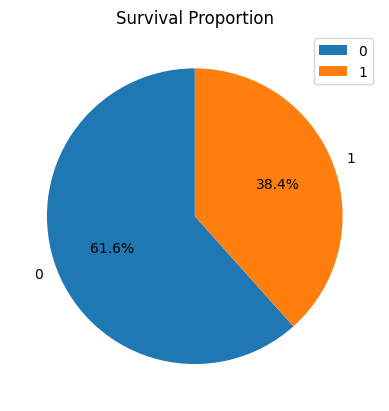

In [120]:
# Survival proportion
survival.plot.pie(y='count', labels=survival['survived'], autopct='%1.1f%%', startangle=90)
plt.title("Survival Proportion")
plt.ylabel('')
plt.show()


### Showed the overall ratio of passengers who survived vs. those who did not.

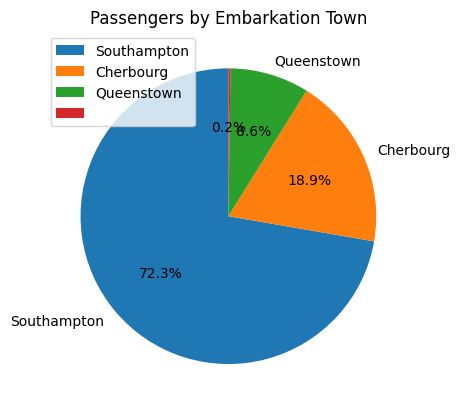

In [121]:
# Embarkation proportion
embark.plot.pie(y='count', labels=embark['embark_town'], autopct='%1.1f%%', startangle=90)
plt.title("Passengers by Embarkation Town")
plt.ylabel('')
plt.show()


### Highlighted the distribution of passengers boarding from Southampton, Cherbourg, and Queenstown.

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


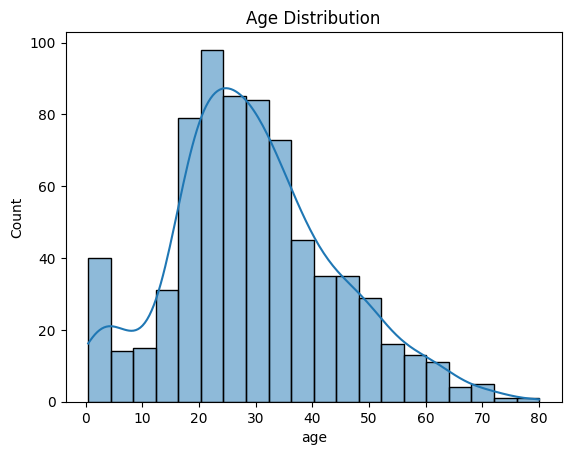

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


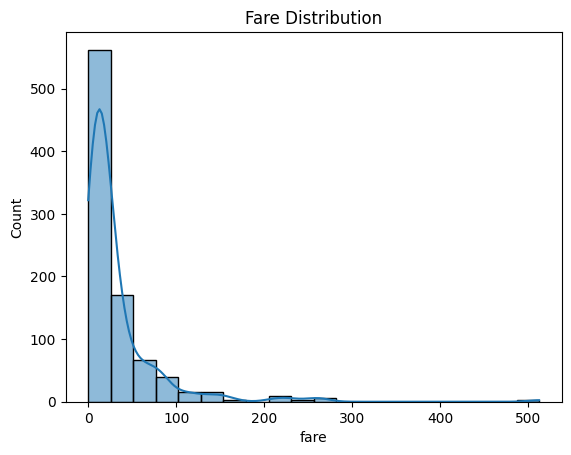

In [122]:
# Age distribution
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

# Fare distribution
sns.histplot(data=df, x='fare', bins=20, kde=True)
plt.title("Fare Distribution")
plt.show()


### Most passengers were between 20–40 years old; fare distribution showed a few passengers paid very high fares.

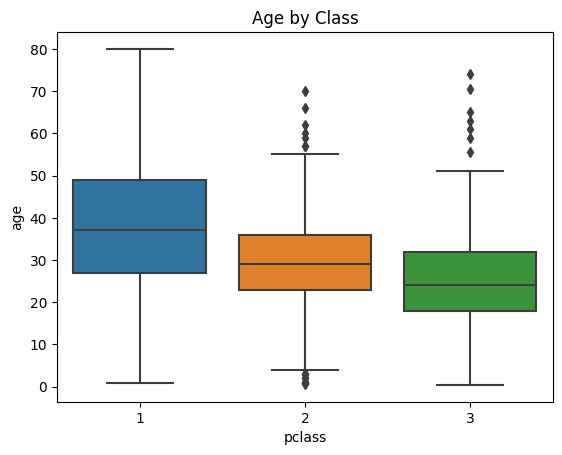

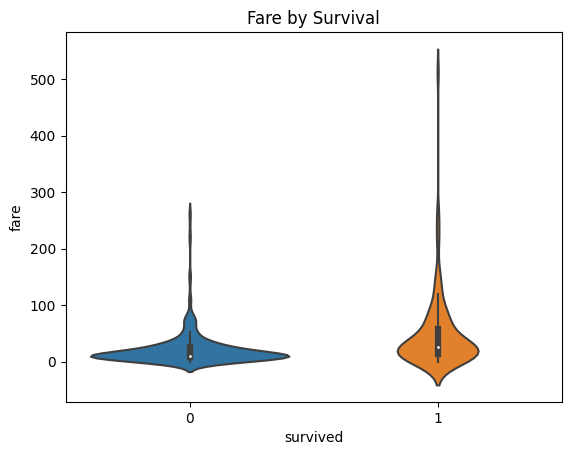

In [123]:
# Age by class
sns.boxplot(data=df, x='pclass', y='age')
plt.title("Age by Class")
plt.show()

# Fare by survival
sns.violinplot(data=df, x='survived', y='fare')
plt.title("Fare by Survival")
plt.show()


### First-class passengers were older on average; survivors paid higher fares.

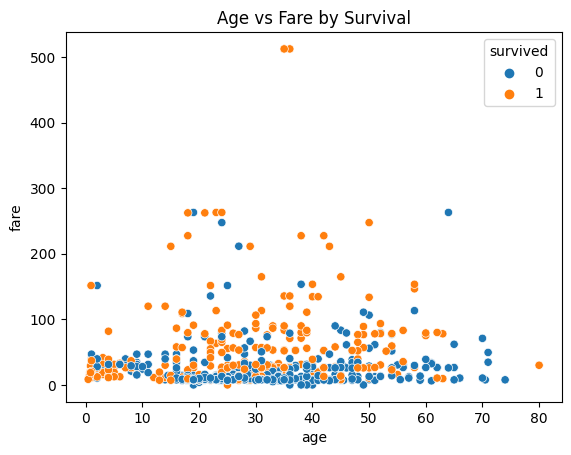

In [124]:
sns.scatterplot(data=df, x='age', y='fare', hue='survived')
plt.title("Age vs Fare by Survival")
plt.show()


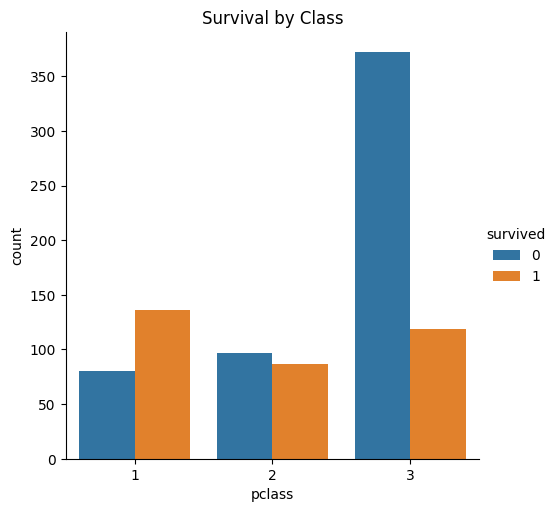

In [125]:
sns.catplot(data=df, x='pclass', hue='survived', kind='count')
plt.title("Survival by Class")
plt.show()


### Fare and class were moderately correlated with survival; age had weaker correlation.

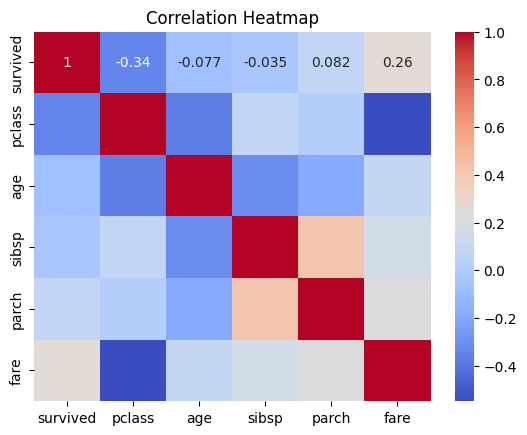

In [126]:
numeric_cols = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


### Correlation analysis suggests class and fare are important features for predictive modeling.

## Conclusion

### This project demonstrates how SQL can be used to summarize and prepare data for analysis and how Python can be used to visualize and explore trends. Combining SQL and Python provides a powerful workflow for exploratory data analysis and insight generation.